# Plots for Matching Lambda

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.stats import norm

# Get list of all .npy files in the folder
file_list = glob.glob('/Users/swissjab/Desktop/uzh_vision/VO_miniproject/Code/plots/*.npy')
print(file_list)

# Initialize dictionaries to store mean and std data
mean_data = {}
std_data = {}
nb_matches_data = {}

# Loop through the files and store mean, std, and nb_matches data
for file in file_list:
    data = np.load(file)
    if 'mean' in file:
        if 'Harris' in file:
            mean_data['Harris'] = data
        elif 'Sift' in file:
            mean_data['SIFT'] = data
        elif 'Shi_tomasi' in file:
            mean_data['Shi Tomasi'] = data
    elif 'std' in file:
        if 'Harris' in file:
            std_data['Harris'] = data
        elif 'Sift' in file:
            std_data['SIFT'] = data
        elif 'Shi_tomasi' in file:
            std_data['Shi Tomasi'] = data
    elif 'nb_matches' in file:
        if 'Harris' in file:
            nb_matches_data['Harris'] = data
        elif 'Sift' in file:
            nb_matches_data['SIFT'] = data
        elif 'Shi_tomasi' in file:
            nb_matches_data['Shi Tomasi'] = data

# Initialize a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot mean values with Gaussian process samples on the first subplot
x = range(len(next(iter(mean_data.values()))))
for label in mean_data:
    mean = mean_data[label]
    std = std_data[label]
    samples = [norm.rvs(loc=mean[i], scale=std[i], size=100) for i in range(len(mean))]
    samples_mean = np.mean(samples, axis=1)
    samples_std = np.std(samples, axis=1)
    ax1.plot(x, samples_mean, label=f'{label} Mean with Standard Deviation')
    ax1.fill_between(x, samples_mean - samples_std, samples_mean + samples_std, alpha=0.2)

# Add legend and labels for the first subplot
ax1.legend(loc='upper left')
ax1.set_xlabel('Match lambda')
ax1.set_ylabel('SSD Mean [px]')
ax1.set_title('Mean Matches with Gaussian Process Samples')

# Plot nb_matches data on the second subplot
for label in nb_matches_data:
    nb_matches = nb_matches_data[label]
    ax2.plot(x, nb_matches, linestyle='--', label=f'{label} Nb Matches')

# Add legend and labels for the second subplot
ax2.legend(loc='upper left')
ax2.set_xlabel('Match lambda')
ax2.set_ylabel('Nb Matches')
ax2.set_title('Number of Matches')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


<h1>Trajectory Deviation of different models</h1>


['/Users/swissjab/Desktop/uzh_vision/VO_miniproject/Code/plots/pose_sift_parking.txt', '/Users/swissjab/Desktop/uzh_vision/VO_miniproject/Code/plots/pose_harris_parking.txt', '/Users/swissjab/Desktop/uzh_vision/VO_miniproject/Code/plots/pose_shi_tomasi_parking.txt']


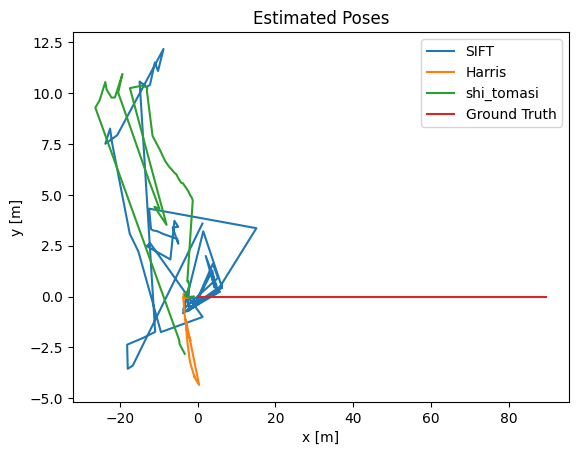

In [10]:
# get the poses txt files in the folder
file_list = glob.glob('/Users/swissjab/Desktop/uzh_vision/VO_miniproject/Code/plots/pose*.txt')
print(file_list)

#load the data from the txt files and differeniating between the different methods
data = {}
for file in file_list:
    if 'harris' in file:
        data['Harris'] = np.loadtxt(file)
    elif 'sift' in file:
        data['SIFT'] = np.loadtxt(file)
    elif 'shi_tomasi' in file:
        data['shi_tomasi'] = np.loadtxt(file)

# get the ground truth poses
ground_truth = np.loadtxt('/Users/swissjab/Desktop/uzh_vision/VO_miniproject/Datasets/parking/poses.txt')

# plot the 4th, 8th column of the poses, this should give the x,y coordinates of the poses
fig, ax = plt.subplots()
for label in data:
    ax.plot(data[label][:, 3], data[label][:, 7], label=label)
ax.plot(ground_truth[:, 3], ground_truth[:, 7], label='Ground Truth')
ax.legend()
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('Estimated Poses')
plt.show()

# 3D poses plot


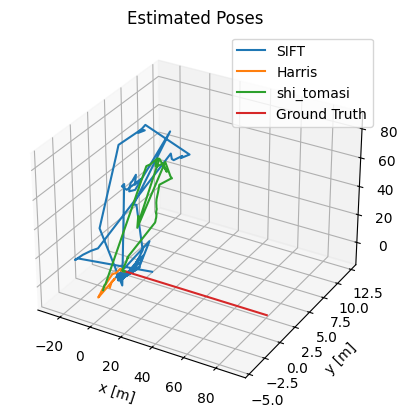

In [11]:
# plot the 4th, 8th and 12th column of the poses, this should give the x,y, z coordinates of the poses
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for label in data:
    ax.plot(data[label][:, 3], data[label][:, 7], data[label][:, 11], label=label)
ax.plot(ground_truth[:, 3], ground_truth[:, 7], ground_truth[:, 11], label='Ground Truth')

ax.legend()
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')
ax.set_title('Estimated Poses')
plt.show()


# Time Distribution for different Descriptors

WARNING: these times are for 2 images

/var/folders/1b/8x_xfy013v9442m4k0cb70hm0000gn/T/ipykernel_90777/2849304370.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([time_data[label] for label in time_data], labels=time_data.keys())


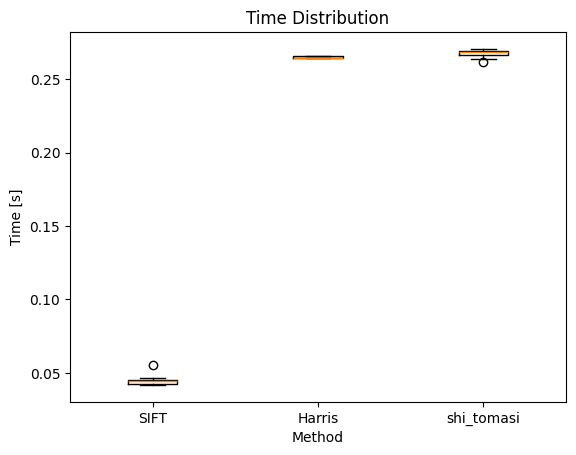

In [18]:
# plot the time distribution of the different methods
time_data = {}
for label in data:
    time_file = f'/Users/swissjab/Desktop/uzh_vision/VO_miniproject/Code/plots/time_{label.lower()}.txt'
    time_data[label] = np.loadtxt(time_file)

fig, ax = plt.subplots()
ax.boxplot([time_data[label] for label in time_data], labels=time_data.keys())
ax.set_xlabel('Method')
ax.set_ylabel('Time [s]')
ax.set_title('Time Distribution')
plt.show()

